# **INFORMASI DATASET**

Dataset ini menyajikan beberapa fitur utama yaitu:

- id
- user_id
- journey_id
- created_at
- updated_at
- enrolling_times
- enrollments_at
- last_enrolled_at
- study_duration
- avg_submission_rating





# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

from imblearn.over_sampling import SMOTE

import joblib
import pickle


# **1. Business Understanding**

## **Business Objective / Tujuan Bisnis**

Dalam platform pembelajaran digital seperti **Dicoding**, proses belajar umumnya berfokus pada penyediaan materi, evaluasi, dan sertifikasi. Namun, siswa sering kali tidak mendapatkan gambaran yang jelas mengenai **bagaimana pola belajar mereka sendiri**, sejauh mana progres yang telah dicapai, serta **gaya belajar dominan** yang mereka miliki.

Setiap siswa memiliki karakteristik belajar yang berbeda. Ada siswa yang cepat menyelesaikan kelas, ada yang belajar secara konsisten dalam durasi tertentu, dan ada pula yang membutuhkan waktu lebih lama namun mendalam. Tanpa insight personal, siswa berpotensi menggunakan strategi belajar yang kurang sesuai dengan karakteristik mereka.

Oleh karena itu, tujuan bisnis dari proyek ini adalah membangun fitur AI Learning Insight yang mampu menganalisis perilaku belajar siswa dan menyajikan insight personal terkait tipe pembelajar, progres belajar, serta area yang dapat ditingkatkan. Konsep ini serupa dengan pendekatan aplikasi Strava, yang tidak hanya mencatat aktivitas, tetapi juga memberikan refleksi performa yang bermakna bagi pengguna.

## **Data Mining Goals / Tujuan Data Mining**

Tujuan data mining dalam proyek ini adalah:

1. Menganalisis pola perilaku belajar siswa berdasarkan data historis aktivitas pembelajaran.
2. Mengklasifikasikan siswa ke dalam beberapa tipe learner (seperti Sonic Learner, Fast Learner, Deep Learner,Reflective Learner, Consistent Learner) berdasarkan karakteristik belajar mereka.
3. Menghasilkan model klasifikasi yang dapat digunakan sebagai dasar penyajian learning insight pada dashboard pengguna.

Model yang dibangun diharapkan memiliki performa yang baik (akurasi > 90%) serta mampu menghasilkan klasifikasi yang mudah diinterpretasikan dan relevan.

## **Assess Situation / Menilai Situasi**

- **Sumber Data**

   Data berasal dari platform Dicoding yang mencakup aktivitas belajar siswa, seperti durasi belajar, frekuensi enroll, dan performa submission, dll.

- **Kondisi Data**

  Dataset tidak memiliki label ground truth terkait tipe learner. Oleh karena itu, pendekatan **rule-based scoring** digunakan sebagai dasar pembentukan label awal, yang kemudian dikembangkan menggunakan model machine learning.

- **Batasan Proyek**

1. Data tidak mencakup faktor eksternal seperti motivasi pribadi, kondisi lingkungan, atau latar belakang pendidikan siswa.

2. Tipe learner yang dihasilkan merupakan interpretasi berbasis data, bukan penilaian absolut terhadap kemampuan siswa.

- **Stakeholder**

  Hasil model digunakan langsung oleh user (siswa) melalui dashboard insight untuk refleksi dan peningkatan strategi belajar

## **Project Plan / Perancangan Proyek**


Tahapan proyek dirancang sebagai berikut:

1. **Data Understanding**

   Memahami struktur data, fitur utama, serta pola awal aktivitas belajar siswa.

2. **Data Preparation**

   Melakukan pembersihan data, pemilihan fitur relevan, serta konstruksi variabel baru yang merepresentasikan kecepatan dan pola belajar.

3. **Rule-Based Scoring**

   Menyusun aturan untuk mengklasifikasikan perilaku belajar sebagai dasar pembentukan learner type awal.

4. **Modeling**

   Membangun dan membandingkan beberapa model klasifikasi untuk memprediksi tipe learner.

5. **Evaluation**

   Mengevaluasi model menggunakan metrik performa serta memastikan hasil dapat digunakan untuk insight pembelajaran.

6. **Deployment (Konseptual)**

   Model dijalankan secara batch analysis tiap akhir minggu untuk memperbarui insight belajar pada dashboard pengguna.

# **2. Data Understanding**

## **Collect Initial Data / Load Dataset**

In [ ]:
url='https://drive.google.com/uc?id=1zPBTXeTnVy9jrynTDuwZw8aOtLNWZAJB'
df = pd.read_csv(url, sep=',')

In [ ]:
df.head(10)

,id,user_id,journey_id,kelas,enrolling_times,enrollments_at,last_enrolled_at,study_duration,avg_submission,xp,difficulty,hours_to_study
0,1377938,96989,256,Belajar Dasar Pemrograman JavaScript,1,16/08/2018 00.45,16/08/2018 00.45,45,NaN,879,0,46
1,5696881,96989,9,Belajar Membangun Game Multi Platform,1,10/07/2020 05.36,10/07/2020 05.36,0,"3,6",200,0,0
2,5095258,96989,763,Laskar AI 2025 ILT Quiz - Soft Skill,1,05/06/2023 22.09,05/06/2023 22.09,2,"3,33",0,0,5
3,8576629,96989,55,Kotlin Android Developer Expert,2,"2018-11-27 16:51:02,2019-01-04 18:07:15",04/01/2019 18.07,0,"4,4",1100,0,0
4,7937765,96989,570,Belajar Dasar Manajemen Proyek,3,"2020-12-21 02:01:16,2021-03-23 16:28:18,2021-0...",27/06/2021 06.40,3,NaN,679,0,2
5,333882,96989,342,Belajar Membuat Aplikasi Back-End untuk Pemula...,1,03/05/2018 15.23,03/05/2018 15.23,12,"4,33",879,0,45
6,1202328,96989,37,Samsung Galaxy SDK,1,10/06/2019 08.39,10/06/2019 08.39,0,"3,4",400,0,0
7,336384,96989,433,Belajar Membangun Arsitektur Microservices,1,08/09/2021 08.25,08/09/2021 08.25,53,3,3279,0,60
8,6952331,96989,191,Memulai Pemrograman dengan Dart,1,02/12/2019 18.49,02/12/2019 18.49,29,NaN,400,0,30
9,3471370,96989,590,Belajar Penerapan Data Science,1,25/12/2019 18.25,25/12/2019 18.25,219,"4,67",3279,0,110


## **Describe Data**

In [ ]:
df.shape

(16468, 12)

Data terdiri dari **5032 baris** dan **10 kolom**

### **Informasi Dasar**

In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                16468 non-null  int64 
 1   user_id           16468 non-null  int64 
 2   journey_id        16468 non-null  int64 
 3   kelas             16468 non-null  object
 4   enrolling_times   16468 non-null  int64 
 5   enrollments_at    16468 non-null  object
 6   last_enrolled_at  16468 non-null  object
 7   study_duration    16468 non-null  int64 
 8   avg_submission    12782 non-null  object
 9   xp                16468 non-null  int64 
 10  difficulty        16468 non-null  int64 
 11  hours_to_study    16468 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.5+ MB


In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,id,user_id,journey_id,enrolling_times,study_duration,xp,difficulty,hours_to_study
count,1.646800e+04,1.646800e+04,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000
mean,4.981537e+06,4.904497e+06,400.874241,1.399138,28.938001,819.366590,0.202818,29.122601
std,2.909458e+06,2.943438e+06,269.835248,0.660388,37.437307,979.385277,0.551396,32.402462
min,1.024400e+04,3.390000e+03,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.417618e+06,2.173542e+06,159.000000,1.000000,1.000000,0.000000,0.000000,2.000000
50%,4.963618e+06,5.049899e+06,372.000000,1.000000,14.000000,400.000000,0.000000,15.000000
75%,7.522911e+06,7.382799e+06,625.000000,2.000000,45.000000,1100.000000,0.000000,45.000000
max,9.999656e+06,9.999901e+06,905.000000,3.000000,297.000000,3279.000000,3.000000,150.000000


### **Exploratory Data Analysis**

/tmp/ipython-input-856122958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="enrolling_times", data=df, palette="Set2")


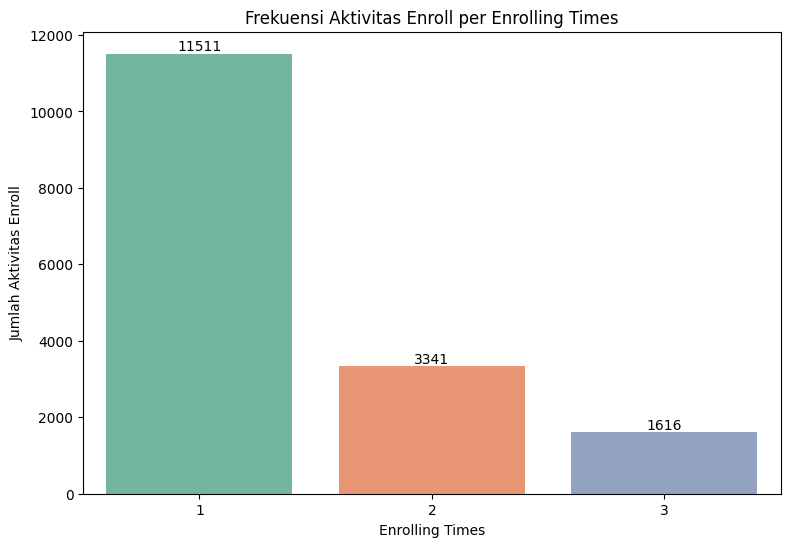

In [ ]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x="enrolling_times", data=df, palette="Set2")

# Tambahkan label di atas batang
for container in ax.containers:
    ax.bar_label(container)

plt.title("Frekuensi Aktivitas Enroll per Enrolling Times")
plt.xlabel("Enrolling Times")
plt.ylabel("Jumlah Aktivitas Enroll")
plt.show()

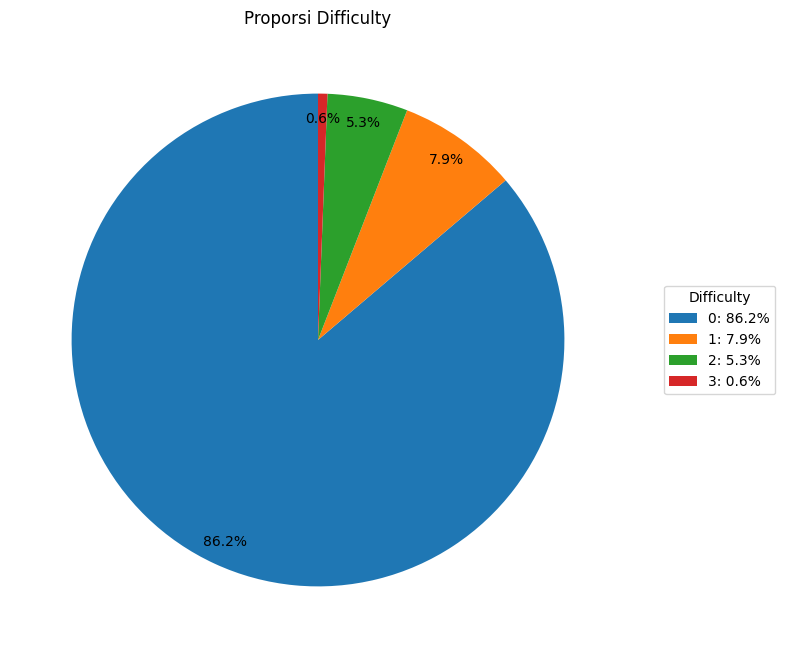

In [ ]:
plt.figure(figsize=(8,8))
counts = df["difficulty"].value_counts()
percentages = (counts / counts.sum() * 100).round(1)

wedges, texts, autotexts = plt.pie(
    counts,
    autopct="%1.1f%%",
    startangle=90,
    labels=[""] * len(counts),
    pctdistance=0.9
)

labels_legend = [f"{cls}: {pct}%" for cls, pct in zip(counts.index, percentages)]
plt.legend(
    wedges,
    labels_legend,
    title="Difficulty",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5)
)

plt.title("Proporsi Difficulty")
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

## **Memeriksa Nilai Missing Values**

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
avg_submission,3686


Terdapat nilai missing values pada kolom ini dimana nilai avg_submission = 0 namun itu **karena kelas tersebut tidak memiliki sebuah submission**.

## **Memeriksa Nilai Duplikat**

In [ ]:
duplicates = df.duplicated().sum()
print("Jumlah data duplikat:", duplicates)

Jumlah data duplikat: 0


## **Melakukan Penghapusan Kolom**

Tahapan ini akan dilewati karena seluruh kolom yang akan dijadikan fitur akan dipilih saat tahapan **Construct Data** nanti.

## **Melakukan Handling Pada Nilai Missing Values**

Tahapan ini akan dilewati karena kelas dengan nilai avg_submission = 0 adalah **kelas yang tidak memiliki sebuah submission**.

## **Melakukan Handling Pada Nilai Duplikat**

Tahapan ini akan dilewati karena tidak ada nilai duplikat pada kolom.

## **Memeriksa Nilai Outlier**

In [ ]:
kolom = ["study_duration", "difficulty", "hours_to_study", "enrolling_times"]

# Hitung batas bawah & atas
Q1 = df[kolom].quantile(0.25)
Q3 = df[kolom].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Hitung jumlah outlier
jumlah_outlier = ((df[kolom] < batas_bawah) | (df[kolom] > batas_atas)).sum()

print(f"Jumlah outlier pada kolom {kolom}:")
print(jumlah_outlier)

Jumlah outlier pada kolom ['study_duration', 'difficulty', 'hours_to_study', 'enrolling_times']:
study_duration      667
difficulty         2269
hours_to_study      478
enrolling_times       0
dtype: int64


Tahapan **handling pada nilai outlier akan dilewati** karena kolom yang memiliki **nilai outlier sebenarnya tidak jauh berbeda dengan nilai asli** pada kolom-kolom tersebut/tidak ada nilai extreme yang mengharuskan untuk baris tersebut dihapus/diimputasi.

# **RULE BASE SCORING**

## **Construct Data**

### **Memakai kolom fitur saja untuk dipakai nanti**

**Kolom awal df_fitur**

In [ ]:
df_fitur = df[["user_id", "journey_id", "last_enrolled_at", "study_duration", "hours_to_study", "avg_submission"]]

Seleksi Kolom relevan yang akan dipakai untuk melalukan klasifikas nanti

In [ ]:
df_fitur["avg_submission"] = (
    df_fitur["avg_submission"]
      .astype(str)
      .str.replace(",", ".", regex=False)
)

df_fitur["avg_submission"] = pd.to_numeric(
    df_fitur["avg_submission"],
    errors="coerce"
)

df_fitur.head()

/tmp/ipython-input-1842580053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitur["avg_submission"] = (
/tmp/ipython-input-1842580053.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitur["avg_submission"] = pd.to_numeric(


,user_id,journey_id,last_enrolled_at,study_duration,hours_to_study,avg_submission
0,96989,256,16/08/2018 00.45,45,46,NaN
1,96989,9,10/07/2020 05.36,0,0,3.60
2,96989,763,05/06/2023 22.09,2,5,3.33
3,96989,55,04/01/2019 18.07,0,0,4.40
4,96989,570,27/06/2021 06.40,3,2,NaN


In [ ]:
df_fitur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           16468 non-null  int64  
 1   journey_id        16468 non-null  int64  
 2   last_enrolled_at  16468 non-null  object 
 3   study_duration    16468 non-null  int64  
 4   hours_to_study    16468 non-null  int64  
 5   avg_submission    12782 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 772.1+ KB


### **Membuat kolom baru (persentase_kecepatan)**

In [ ]:
df_fitur["persentase_kecepatan"] = 0  # default

mask = df_fitur["hours_to_study"] > 0
df_fitur.loc[mask, "persentase_kecepatan"] = (
    (df_fitur["hours_to_study"] - df_fitur["study_duration"])
    / df_fitur["hours_to_study"]
)

df_fitur["persentase_kecepatan"] = df_fitur["persentase_kecepatan"].round(2)

/tmp/ipython-input-1142314031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitur["persentase_kecepatan"] = 0  # default
/tmp/ipython-input-1142314031.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.02173913  0.6        -0.5        ...  0.         -0.36363636
  0.26086957]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_fitur.loc[mask, "persentase_kecepatan"] = (
/tmp/ipython-input-1142314031.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Pada tahap ini dibuat variabel baru bernama persentase_kecepatan, yang merepresentasikan perbandingan antara durasi belajar aktual siswa (study_duration) dengan estimasi waktu belajar normal (hours_to_study).


Variabel ini digunakan untuk mengukur apakah seorang siswa:

*   Menyelesaikan kelas lebih cepat dari waktu normal,
*   Lebih lambat dari estimasi,
*   Atau berada pada rentang waktu yang wajar.

Nilai persentase kemudian dibulatkan untuk mempermudah interpretasi dan penerapan aturan (rule).

### **Membuat kolom point**

In [ ]:
df_fitur["point"] = 0
df_fitur.loc[df_fitur["persentase_kecepatan"] >= 0.20, "point"] = -1
df_fitur.loc[df_fitur["persentase_kecepatan"] <= -0.20, "point"] = 1

/tmp/ipython-input-2887199869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitur["point"] = 0


Berdasarkan nilai persentase_kecepatan, diterapkan sistem rule-based scoring sederhana untuk setiap journey pembelajaran:

*   Siswa yang belajar jauh lebih cepat dari waktu normal diberikan skor -1
*   Siswa yang belajar jauh lebih lambat diberikan skor +1
*   Siswa dengan durasi belajar mendekati estimasi normal diberikan skor 0

Pendekatan ini bertujuan untuk mengubah pola belajar yang bersifat kontinu menjadi representasi diskrit, sehingga lebih mudah dianalisis dan diagregasi pada level user.

### **Membuat Kolom Keterangan per kelas**

In [ ]:
def tentukan_tipe(score):
    if score <= -0.20:
        return "faster than normal"
    elif score >= 0.20:
        return "slower than normal"
    else:
        return "normal to average"

df_fitur["keterangan"] = df_fitur["point"].apply(tentukan_tipe)

/tmp/ipython-input-4018601620.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitur["keterangan"] = df_fitur["point"].apply(tentukan_tipe)


Untuk meningkatkan keterbacaan dan interpretasi data, setiap nilai skor diberikan keterangan deskriptif, yaitu faster than normal, normal to average, dan slower than normal. Keterangan ini berfungsi sebagai penjelasan non-teknis yang dapat membantu analisis eksploratif dan validasi logika rule-based scoring.

In [ ]:
df_fitur.head(30)

,user_id,journey_id,last_enrolled_at,study_duration,hours_to_study,avg_submission,persentase_kecepatan,point,keterangan
0,96989,256,16/08/2018 00.45,45,46,NaN,0.02,0,normal to average
1,96989,9,10/07/2020 05.36,0,0,3.60,0.00,0,normal to average
2,96989,763,05/06/2023 22.09,2,5,3.33,0.60,-1,faster than normal
3,96989,55,04/01/2019 18.07,0,0,4.40,0.00,0,normal to average
4,96989,570,27/06/2021 06.40,3,2,NaN,-0.50,1,slower than normal
5,96989,342,03/05/2018 15.23,12,45,4.33,0.73,-1,faster than normal
6,96989,37,10/06/2019 08.39,0,0,3.40,0.00,0,normal to average
7,96989,433,08/09/2021 08.25,53,60,3.00,0.12,0,normal to average
8,96989,191,02/12/2019 18.49,29,30,NaN,0.03,0,normal to average
9,96989,590,25/12/2019 18.25,219,110,4.67,-0.99,1,slower than normal


In [ ]:
df_fitur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               16468 non-null  int64  
 1   journey_id            16468 non-null  int64  
 2   last_enrolled_at      16468 non-null  object 
 3   study_duration        16468 non-null  int64  
 4   hours_to_study        16468 non-null  int64  
 5   avg_submission        12782 non-null  float64
 6   persentase_kecepatan  16468 non-null  float64
 7   point                 16468 non-null  int64  
 8   keterangan            16468 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 1.1+ MB


In [ ]:
df_fitur["point"].value_counts()

,count
point,
0,7544
-1,4522
1,4402


### **Agregasi User**

In [ ]:
df_fitur["last_enrolled_at"] = pd.to_datetime(
    df_fitur["last_enrolled_at"].astype(str).str.replace(
        r"(\d{1,2})\.(\d{2})$", r"\1:\2", regex=True
    ),
    dayfirst=True,
    errors="coerce"
)

idx_latest = df.groupby("user_id")["last_enrolled_at"].idxmax()
last_kelas_per_user = df.loc[idx_latest, ["user_id", "kelas"]].set_index("user_id")

df_user = (
    df_fitur.groupby("user_id")
    .agg(
        total_point         = ("point", "sum"),
        mean_point          = ("point", "mean"),
        n_kelas             = ("user_id", "size"),
        fast                = ("point", lambda s: (s == -1).sum()),
        normal              = ("point", lambda s: (s == 0).sum()),
        slow                = ("point", lambda s: (s == 1).sum()),
        n_avg_submission    = ("avg_submission", lambda s: s.mean(skipna=True)),
        last_enrolled_at    = ("last_enrolled_at", "max")
    )
    .reset_index()
)

last_kelas_per_user = last_kelas_per_user.reset_index().rename(columns={"kelas":"last_class"})
df_user = df_user.merge(last_kelas_per_user, on="user_id", how="left")

/tmp/ipython-input-9721595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fitur["last_enrolled_at"] = pd.to_datetime(


Setelah penilaian dilakukan pada level kelas (journey), data kemudian diagregasi ke level user. Pada tahap ini dihitung beberapa metrik penting seperti total skor, rata-rata skor, jumlah kelas yang diikuti, serta frekuensi perilaku cepat, normal, dan lambat.

Agregasi ini bertujuan untuk membentuk **profil belajar setiap siswa**, yang mencerminkan pola belajar secara keseluruhan, bukan hanya berdasarkan satu kelas.

###  **Membuat Kolom & Menentukan Tipe Learner**

In [ ]:
def tentukan_tipe(score):
    score = np.round(score, 2)
    if score <= -0.40:
        return "Sonic Learner"
    elif score <= -0.20:
        return "Fast Learner"
    elif score >= 0.40:
        return "Deep Learner"
    elif score >= 0.20:
        return "Reflective Learner"
    else:
        return "Consistent Learner"

df_user["learner_type"] = df_user["mean_point"].apply(tentukan_tipe)


Tahap terakhir dalam rule-based scoring adalah menentukan tipe learner berdasarkan nilai rata-rata skor (mean_point) setiap user. Aturan ini dirancang untuk memetakan pola belajar ke dalam beberapa kategori learner seperti Sonic Learner, Fast Learner, Consistent Learner, Reflective Learner, dan Deep Learner.

In [ ]:
df_user.head(30)

,user_id,total_point,mean_point,n_kelas,fast,normal,slow,n_avg_submission,last_enrolled_at,last_class,learner_type
0,3390,1,0.055556,18,5,7,6,3.996000,2023-07-13 07:48:00,Kotlin Android Developer Expert,Consistent Learner
1,5774,-1,-0.083333,12,3,7,2,3.892222,2023-06-19 19:20:00,Belajar Pemrograman Rust untuk Pemula,Consistent Learner
2,11836,-1,-0.034483,29,7,16,6,4.308696,2023-11-21 19:32:00,Tes Seleksi BEKUP Create: Upskilling Bootcamp ...,Consistent Learner
3,15166,-5,-0.500000,10,7,1,2,3.621250,2023-10-28 06:43:00,Belajar Machine Learning untuk Pemula,Sonic Learner
4,15507,3,0.103448,29,3,20,6,4.035238,2025-04-01 22:48:00,Belajar Dasar Pemrograman JavaScript,Consistent Learner
5,17833,4,0.166667,24,5,10,9,3.820556,2025-01-29 08:11:00,Belajar Matematika untuk Data Science,Consistent Learner
6,32258,1,0.050000,20,6,7,7,3.856000,2024-06-06 14:24:00,Belajar Dasar-Dasar Azure Cloud,Consistent Learner
7,39414,-4,-0.210526,19,8,7,4,4.116429,2023-10-04 10:51:00,Belajar Penerapan Machine Learning untuk Flutter,Fast Learner
8,60558,2,0.125000,16,3,8,5,4.312727,2024-07-11 13:16:00,DevOps Praktis dengan IBM Cloud (Practical Dev...,Consistent Learner
9,64678,-1,-0.047619,21,5,12,4,3.751250,2024-03-12 14:37:00,Belajar Pemrograman Rust untuk Pemula,Consistent Learner


In [ ]:
df_user["learner_type"].value_counts()

,count
learner_type,
Consistent Learner,612
Fast Learner,111
Reflective Learner,86
Sonic Learner,11
Deep Learner,11


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           831 non-null    int64         
 1   total_point       831 non-null    int64         
 2   mean_point        831 non-null    float64       
 3   n_kelas           831 non-null    int64         
 4   fast              831 non-null    int64         
 5   normal            831 non-null    int64         
 6   slow              831 non-null    int64         
 7   n_avg_submission  831 non-null    float64       
 8   last_enrolled_at  831 non-null    datetime64[ns]
 9   last_class        831 non-null    object        
 10  learner_type      831 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 71.5+ KB


CATATAN:

 Dilakukan kolom poin per kelas dan tidak langsung agregasi adalah untuk mencegah agar salah satu kelas yang terlalu dominan pada sisi lambat/cepat tidak terlalu ber efek pada hasil pola pembelajaran

# **4. Membangun Model Klasifikasi**

In [ ]:
x = df_user[[
    "fast",
    "slow",
    "normal"
]]

y = df_user["learner_type"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("Sebelum SMOTE:", Counter(y_train))
print("Sesudah SMOTE :", Counter(y_train_smote))


Sebelum SMOTE: Counter({'Consistent Learner': 489, 'Fast Learner': 88, 'Reflective Learner': 69, 'Sonic Learner': 9, 'Deep Learner': 9})
Sesudah SMOTE : Counter({'Consistent Learner': 489, 'Reflective Learner': 489, 'Fast Learner': 489, 'Sonic Learner': 489, 'Deep Learner': 489})


## **Model 1 Decision Tree Classifier**

In [ ]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier()

## **Model 2 Random Forest Classifier**

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train_smote, y_train_smote)

RandomForestClassifier()

## **Model 3 K-Nearest Neighbors**

In [ ]:
model_knn = KNeighborsClassifier(
    n_neighbors=3,
    metric="manhattan",
    weights="distance"
)
model_knn.fit(x_train_smote, y_train_smote)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

# **5. Evaluasi Model Klasifikasi**

In [ ]:
models = {
    "Decision Tree": model_dtc,
    "Random Forest": model_rf,
    "KNN": model_knn
}

metrics_results = {}

for name, clf in models.items():
    y_pred_smote = clf.predict(x_test)

    metrics_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred_smote),
        "Precision": precision_score(y_test, y_pred_smote, average='weighted'),
        "Recall": recall_score(y_test, y_pred_smote, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred_smote, average='weighted'),
    }

metrics_df = pd.DataFrame(metrics_results).T
display(metrics_df.style.highlight_max(color='lightgreen', axis=0))

,Accuracy,Precision,Recall,F1-Score
Decision Tree,0.940120,0.942543,0.940120,0.940782
Random Forest,0.964072,0.967237,0.964072,0.963454
KNN,0.922156,0.934496,0.922156,0.925106


In [ ]:
print("Distribusi y_test:")
print(y_test.value_counts())


Distribusi y_test:
learner_type
Consistent Learner    123
Fast Learner           23
Reflective Learner     17
Sonic Learner           2
Deep Learner            2
Name: count, dtype: int64


## **Confusion Matrix**

### **Decision Tree Classifier**

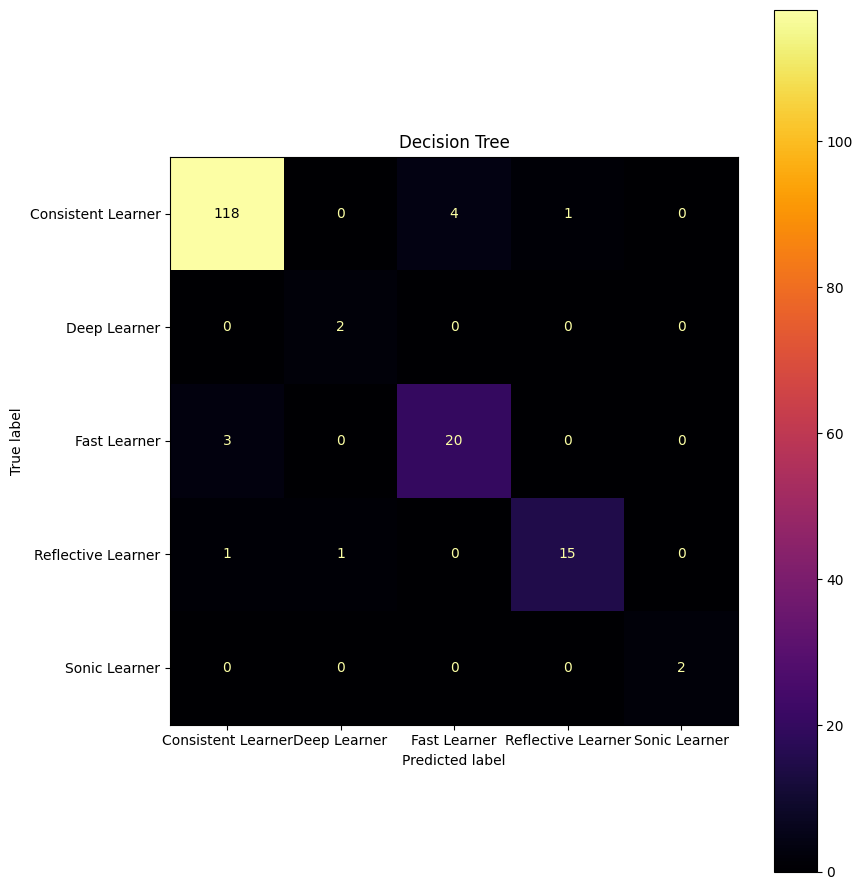

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))

y_pred_dtc = model_dtc.predict(x_test)

actual_labels = sorted(y_test.unique())

knn_cm = confusion_matrix(y_test, y_pred_dtc, labels=actual_labels)
knn_cm_display = ConfusionMatrixDisplay(confusion_matrix=knn_cm,
                                        display_labels=actual_labels)

knn_cm_display.plot(ax=ax, cmap='inferno')
ax.grid(False)
ax.set_title("Decision Tree")
plt.tight_layout()
plt.show()


### **Random Forest**

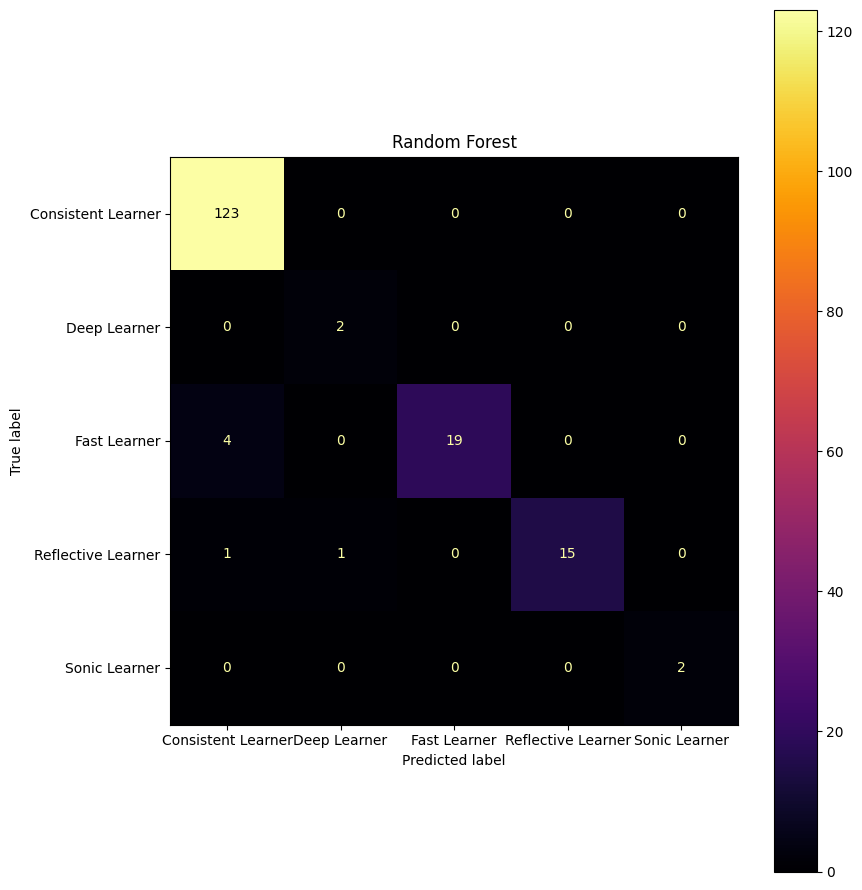

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))

y_pred_rf = model_rf.predict(x_test)

actual_labels = sorted(y_test.unique())

knn_cm = confusion_matrix(y_test, y_pred_rf, labels=actual_labels)
knn_cm_display = ConfusionMatrixDisplay(confusion_matrix=knn_cm,
                                        display_labels=actual_labels)

knn_cm_display.plot(ax=ax, cmap='inferno')
ax.grid(False)
ax.set_title("Random Forest")
plt.tight_layout()
plt.show()


### **K-Nearest Neighbor**

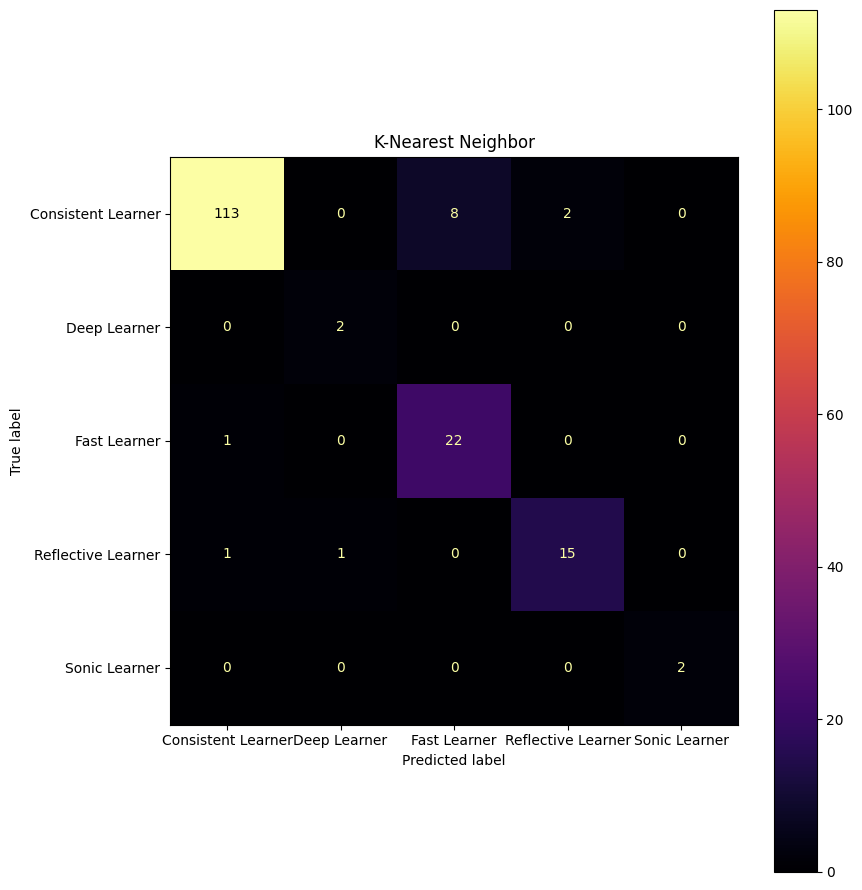

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))

y_pred_knn = model_knn.predict(x_test)

actual_labels = sorted(y_test.unique())

knn_cm = confusion_matrix(y_test, y_pred_knn, labels=actual_labels)
knn_cm_display = ConfusionMatrixDisplay(confusion_matrix=knn_cm,
                                        display_labels=actual_labels)

knn_cm_display.plot(ax=ax, cmap='inferno')
ax.grid(False)
ax.set_title("K-Nearest Neighbor")
plt.tight_layout()
plt.show()


## **Best Model**

Berdasarkan proses pemodelan dan evaluasi yang telah dilakukan, tiga algoritma klasifikasi diuji, yaitu **Decision Tree Classifier, Random Forest Classifier, dan K-Nearest Neighbors.** Evaluasi model dilakukan menggunakan metrik kuantitatif seperti **accuracy, precision, recall, dan F1-score**, serta analisis kualitatif melalui **confusion matrix.**

Meskipun **Random Forest** menunjukkan performa yang lebih baik pada beberapa metrik evaluasi, model **Decision Tree Classifier (DTC)** dipilih sebagai **model terbaik** dalam proyek ini. Keputusan ini tidak hanya didasarkan pada nilai metrik numerik, tetapi juga pada **kualitas distribusi prediksi** yang dihasilkan oleh model.

Berdasarkan hasil **confusion matrix**, Decision Tree menunjukkan **keseimbangan yang lebih baik antara true label dan predicted label** pada masing-masing kelas learner. Model ini mampu mengklasifikasikan tipe learner dengan kesalahan yang lebih terkontrol dan pola kesalahan yang lebih mudah diinterpretasikan dibandingkan Random Forest, yang cenderung mengalami mis-klasifikasi pada beberapa kelas tertentu.

Maka **Decision Tree Classifier** dipilih sebagai **best model** untuk mengklasifikasikan tipe learner pada fitur AI Learning Insight.

# **6. Deployment/Saving Model per Week**

In [ ]:
joblib.dump(model_dtc, 'model_dtc.h5')

['model_dtc.h5']

In [ ]:
with open("model_dtc.pkl", "wb") as file:
    pickle.dump(model_dtc, file)

In [ ]:
df_final = df_user.copy()

x = df_final[['fast', 'slow', 'normal']]
df_final["learner_type_model"] = model_dtc.predict(x)

df_final = df_final.drop(columns="learner_type")

In [ ]:
df_final.to_csv("df_final.csv", index=False)